## Rosenberg Self-Esteem (RSE) Scale Dataset

The Rosenberg self-esteem scale, developed by sociologist Dr. Morris Rosenberg, is a self-esteem measure widely used in social-science research. It uses a scale of 0-30 where a score less than 15 may indicate a problematic low self esteem.


## Dataset Description

This data was collected online with an interactive version of the Rosenberg Self-Esteem Scale (see Rosenberg, M. (1965). Society and the adolescent self-image. Princeton, NJ: Princeton University Press).

Individuals were informed at the start of the test that their data would be saved. When they completed the test they were asked to confirm that the responses they had given were accurate and could be used for research, only those who confirmed are included in this dataset (75.7% confirmed). Below is a description of each variable in my dataset.

**Data Dictionary**

Variable |	Definition| Key
--- | --- | ----
Q1 | I feel that I am a person of worth, at least on an equal plane with others. | 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q2 | I feel that I have a number of good qualities.	| 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q3 | All in all, I am inclined to feel that I am a failure. | 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q4 | I am able to do things as well as most other people. | 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q5 | I feel I do not have much to be proud of. | 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q6 | I take a positive attitude toward myself. | 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q7 | On the whole, I am satisfied with myself. | 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q8 | I wish I could have more respect for myself. |	1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q9 | I certainly feel useless at times.	|1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
Q10 | At times I think I am no good at all. | 1=strongly disagree, 2=disagree, 3=agree, 4=strongly agree (0=no answer)
gender | Chosen from a drop down list. | 1=male, 2=female, 3=other; 0=none was chosen
age | Entered as a free response. | 0=response that could not be converted to integer
source | How the user came to the page (HTTP referer) | 1=front page of personality test website, 2=Google search, 3=other.
country | Inferred from technical information using MaxMind GeoLite. |

### Procedure
The scale consists of ten statements that could be answered on a four-point scale, ranging from strongly agree - to strongly disagree. Five of the statements are positively worded and five are negatively worded ones. The items should be answered without overthinking.

### Scoring
Questions 3, 5, 8, 9, 10 (negatively worded) are reverse scored. Give “Strongly Disagree” 4 points, “Disagree” 3 points, “Agree” 2 points, and “Strongly Agree” 1 point. Sum scores for all ten items. Keep scores on a continuous scale. Higher scores indicate higher self-esteem. 

## 1. Question(s)


1. What is the average test score?
2. What is the percentage of people with problematic low self-esteem (score < 15)?
3. What factors (gender, age) made people more likely to score better in self-esteem?


## 2. Wrangle

Here, I'm loading the csv data into pandas dataframe.

In [144]:
import pandas as pd

rse_df_org = pd.read_csv('RSE/rse-data.csv')
rse_df_org.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,gender,age,source,country
0,3,3,1,4,3,4,3,2,3,3,1,40,1,US
1,4,4,1,3,1,3,3,2,3,2,1,36,1,US
2,2,3,2,3,3,3,2,3,3,3,2,22,1,US
3,4,3,2,3,2,3,2,3,3,3,1,31,1,US
4,4,4,1,4,1,4,4,1,1,1,1,30,1,EU


In [145]:
len(rse_df_org)

47974

### General Statistics

In [146]:
rse_df_org.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,gender,age,source
count,47974.000000,47974.000000,47974.000000,47974.000000,47974.000000,47974.000000,47974.000000,47974.000000,47974.000000,47974.000000,47974.000000,4.797400e+04,47974.000000
mean,3.004940,3.087381,2.296265,2.908930,2.374870,2.555634,2.435215,2.684788,2.773294,2.568996,1.620711,4.479703e+04,1.541043
std,0.875506,0.824040,0.964855,0.828624,0.986816,0.934463,0.946951,0.969243,1.007490,1.083867,0.526069,9.804533e+06,0.853600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.800000e+01,1.000000
50%,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.200000e+01,1.000000
75%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.200000e+01,2.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.147484e+09,3.000000


The above table shows that I'm dealing with 47,974 test cases. However, some questions, gender and age have zero values, which needs to be cleaned. Also, age range is unrealistic and needs to be trimmed as well.

In [147]:
# removing zero values & re-definning age range
rse_df = rse_df_org[(rse_df_org != 0).all(1)]
rse_df = rse_df[rse_df.gender != 3]
rse_df = rse_df[(rse_df.age >= 12) & (rse_df.age <= 50)]

len(rse_df)
rse_df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,gender,age,source
count,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000
mean,2.995582,3.089510,2.330316,2.912747,2.411345,2.545111,2.428782,2.720258,2.817940,2.618491,1.625618,24.468216,1.542451
std,0.865695,0.788242,0.950215,0.805854,0.973105,0.924574,0.935203,0.948737,0.980371,1.063614,0.483969,9.306640,0.854272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,18.000000,1.000000
50%,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,21.000000,1.000000
75%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,29.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,50.000000,3.000000


Now, my data looks cleaner and the age ranges between 12 - 50 years old. The reason I chose this range is because I want to analyze the self-esteem against a full spectrum of psychological personality development that includes pre-college, college students, regular employees, and retirees.

## 3. Explore

As a start, I calculated the sum score for each row. Based on the proposed scoring system, the questions are divided into two sets: positively worded, where their scores are taken as they are, and negatively worded, where the reverse of each score is taken. Hence, I defined a function to do that.

In [148]:
pos_col_list = ['Q1', 'Q2', 'Q4', 'Q6', 'Q7']
neg_col_list = ['Q3', 'Q5', 'Q8', 'Q9', 'Q10']

In [149]:
def map_neg_score(s):
    if(s == 4): return 1
    elif(s == 3): return 2
    elif(s == 2): return 3
    elif(s == 1): return 4

In [150]:
# calculate total score for each row
rse_df['score'] = rse_df[neg_col_list].applymap(map_neg_score).sum(axis=1) + rse_df[pos_col_list].sum(axis=1)

def score_translate(s):
    if(s <= 15):
        return 1
    else:
        return 0
    
rse_df['is_low'] = rse_df['score'].apply(score_translate)

Populating the interactive namespace from numpy and matplotlib


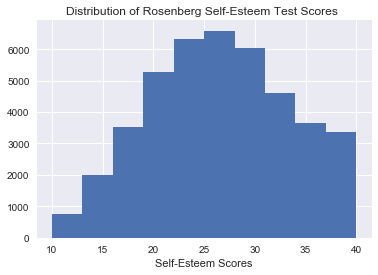

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

plt.hist(rse_df.score)
plt.xlabel('Self-Esteem Scores')
plt.title('Distribution of Rosenberg Self-Esteem Test Scores ')


In [152]:
avg_score = rse_df.score.mean()
print('{} = {}'.format('Average test score', avg_score))
print('min=', rse_df.score.min(), ', max=', rse_df.score.max())

low = rse_df[rse_df.is_low == 1]
print('{} = {}'.format('\nNumber of participants suffering from low self-esteem', len(low)))

percent_low = len(low) / len(rse_df) * 100
print ('{} = {}'.format('percent_low SE', percent_low))

Average test score = 26.073379893576586
min= 10 , max= 40

Number of participants suffering from low self-esteem = 2760
percent_low SE = 6.556442417331813


In general, this is a very small percentage for people suffering from low self-esteem, which will be a limitation in coming be with accurate results in assessing self-esteem symptoms.

### Gender

In [153]:
# find the number of male and female participants
females = (rse_df[rse_df['gender'] == 2])
print ('{} = {}'.format('Number of female participants', len(females)))
males = (rse_df[rse_df['gender'] == 1])
print ('{} = {}'.format('Number of male participants', len(males)))


# find the percentage of male and female participants
percent_females = len(females) / len(rse_df) * 100
percent_males = len(males) / len(rse_df) * 100
print('\nIt is shown that females represents a bigger portion of the sample:')
print ('{} = {}'.format('percent_females', percent_females))
print ('{} = {}'.format('percent_males', percent_males))


Number of female participants = 26336
Number of male participants = 15760

It is shown that females represents a bigger portion of the sample:
percent_females = 62.56176358798936
percent_males = 37.438236412010646


In [154]:
low_females = (females[(females.is_low == 1)])
print('{} = {}'.format('Number of females suffering from low self-esteem', len(low_females)))

low_males = (males[(males.is_low == 1)])
print('{} = {}'.format('Number of males suffering from low self-esteem', len(low_males)))

percent_low_females = len(low_females)/len(rse_df)*100
percent_low_males = len(low_males)/len(rse_df)*100

print('\n')
print('{} = {}'.format('Percentage of females suffering from low self-esteem', percent_low_females))
print('{} = {}'.format('Percentage of males suffering from low self-esteem', percent_low_males))


Number of females suffering from low self-esteem = 2015
Number of males suffering from low self-esteem = 745


Percentage of females suffering from low self-esteem = 4.786678069175219
Percentage of males suffering from low self-esteem = 1.7697643481565946


### Age

In [155]:
early = rse_df[rse_df.age < 21]
mid = rse_df[(rse_df.age >= 21) & (rse_df.age < 30)]
late = rse_df[rse_df.age >= 30]

percent_early = len(early) / len(rse_df) * 100
percent_mid = len(mid) / len(rse_df) * 100
percent_late = len(late) / len(rse_df) * 100
print ('{} = {}'.format('percentage of early adulthood, ages [15-20]', percent_early))
print ('{} = {}'.format('percentage of mid adulthood,   ages [21-30]', percent_mid))
print ('{} = {}'.format('percentage of late adulthood,  ages [30-50]', percent_late))

percentage of early adulthood, ages [15-20] = 45.38673508171798
percentage of mid adulthood,   ages [21-30] = 29.983846446218166
percentage of late adulthood,  ages [30-50] = 24.629418472063854


In [156]:
low_early = (early[(early.is_low == 1)])
print('{} = {}'.format('Percentage of early adulthood suffering from low self-esteem', len(low_early)/len(rse_df)*100))

low_mid = (mid[(mid.is_low == 1)])
print('{} = {}'.format('Percentage of mid adulthood suffering from low self-esteem', len(low_mid)/len(rse_df)*100))

low_late = (late[(late.is_low == 1)])
print('{} = {}'.format('Percentage of late adulthood suffering from low self-esteem', len(low_late)/len(rse_df)*100))


Percentage of early adulthood suffering from low self-esteem = 4.35670847586469
Percentage of mid adulthood suffering from low self-esteem = 1.3754275940706955
Percentage of late adulthood suffering from low self-esteem = 0.8243063473964273


### Country

In [157]:
rse_df.groupby('country').sum()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,gender,age,source,score,is_low
country,,,,,,,,,,,,,,,
A1,58,60,40,58,45,51,48,41,47,45,28,355,22,507,1
A2,62,62,39,59,46,54,52,49,52,46,26,509,27,532,0
AE,353,363,212,342,225,313,292,280,271,239,172,3057,183,3161,1
AF,14,14,5,13,7,12,11,7,6,6,7,115,6,133,0
AG,8,8,5,6,4,6,5,5,4,3,4,37,2,62,0
AI,3,3,2,2,3,4,4,3,3,4,2,40,1,26,0
AL,103,112,67,109,78,104,93,96,94,88,55,810,53,973,1
AM,15,14,8,13,8,10,8,11,9,10,7,88,6,114,0
AN,13,13,7,11,7,12,13,9,6,7,6,107,4,126,0


In [158]:
us = rse_df[rse_df.country == 'US']
au = rse_df[rse_df.country == 'AU']
ind = rse_df[rse_df.country == 'IN']
nor = rse_df[rse_df.country == 'NO']

print('US:')
low_us = (us[(us.is_low == 1)])
print('{} = {}'.format('Participants %', len(us)/len(rse_df)*100))
print('{} = {}'.format('Low self-esteem %', len(low_us)/len(rse_df)*100))


print('\nNORWAY:')
low_nor = (nor[(nor.is_low == 1)])
print('{} = {}'.format('Participants %', len(nor)/len(rse_df)*100))
print('{} = {}'.format('Low self-esteem %', len(low_nor)/len(rse_df)*100))

print('\nAUSTRALIA:')
low_au = (au[(au.is_low == 1)])
print('{} = {}'.format('Participants %', len(au)/len(rse_df)*100))
print('{} = {}'.format('Low self-esteem %', len(low_au)/len(rse_df)*100))

print('\nINDIA:')
low_ind = (ind[(ind.is_low == 1)])
print('{} = {}'.format('Participants %', len(ind)/len(rse_df)*100))
print('{} = {}'.format('Low self-esteem %', len(low_ind)/len(rse_df)*100))

US:
Participants % = 45.987742303306725
Low self-esteem % = 3.10480805777271

NORWAY:
Participants % = 0.4798555682250095
Low self-esteem % = 0.042759407069555305

AUSTRALIA:
Participants % = 4.955340174838464
Low self-esteem % = 0.34920182440136827

INDIA:
Participants % = 2.86250475104523
Low self-esteem % = 0.07601672367920942


I've chosen a random subset of available countries in my sample. It is shown that the majority of my participans are from US.

## 4. Draw Conclusions (Statistics and Plots)

In this section, I am trying to come up with any meaningful conclusions or correlations based on the above data exploration.

### Correlation Check

In [159]:
##Correlation coefficient

def correlation(x, y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
        
    return (std_x*std_y).mean()
        
age = rse_df['age']
low = rse_df['is_low']

print (correlation(age, low))

-0.10771655745605882


In [160]:
gender = rse_df['gender']
print (correlation(gender, low))

0.05717099867183851


The correlation coefficient is a number between +1 and −1 calculated to represent the linear interdependence of two variables. A negative big result represents a negative correlation, where a positive result represents a positive correlation. In general, the results that I am getting are not big enough to draw confident conclusions between low self-esteem and age or gender.

But one can say in general, that age is negatively related to low self-esteem. Meaning, the older the participants, the higher score they got in self-esteem test. That makes sense, as personality developes as we grow older.


As for gender, in my dataset 2=females and 1=males. Since I am getting a positive correlation coefficient, that might indicate that females suffer from low self-esteem more than males.

### A. How is self-esteem related to gender?

Populating the interactive namespace from numpy and matplotlib


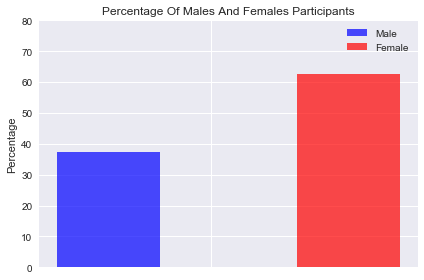

In [161]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def plot_bar(data1, data2, title, col1, col2, n, lbl1,lbl2): 
    
    n_groups = 1
    fig,ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.3

    opacity = 0.7
    error_config = {'ecolor': '0.3'}

    bars1 = plt.bar(index, data1, bar_width,
                     alpha = opacity,
                     color = col1,
                     yerr = 0,
                     error_kw = error_config,
                     label = lbl1)

    bars2 = plt.bar(index + 0.4 + bar_width, data2, bar_width,
                     alpha = opacity,
                     color = col2,
                     yerr = 0,
                     error_kw = error_config,
                     label = lbl2)

    plt.xlabel('')
    plt.ylabel('Percentage')
    plt.title(title)
    plt.xticks(index + bar_width, (''))
    plt.legend()
    plt.yticks(n)

    plt.tight_layout()
    plt.show()
    
plot_bar(percent_males, percent_females,'Percentage Of Males And Females Participants','blue','red',
         np.arange(0, 90, 10), 'Male', 'Female')


Females represnts more participants than males.

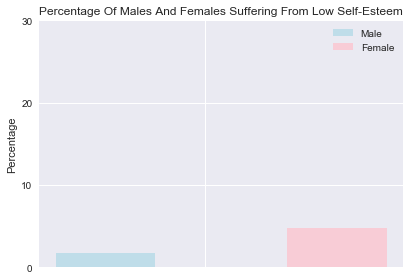

In [162]:
plot_bar(percent_low_males, percent_low_females,'Percentage Of Males And Females Suffering From Low Self-Esteem'
         ,'lightblue','pink', np.arange(0, 40, 10), 'Male', 'Female')


Although the percentages of participants sufferring from low self-esteem overall is very small, still, this percentage is bigger among femlaes than males.

### B. How is self-esteem related to age?

In [163]:
num_early = len(early)
num_mid = len(mid)
num_late = len(late)

num_early_low = len(low_early)
num_mid_low = len(low_mid)
num_late_low = len(low_late)

num_early_good = num_early - num_early_low
num_mid_good = num_mid - num_mid_low
num_late_good = num_late - num_late_low


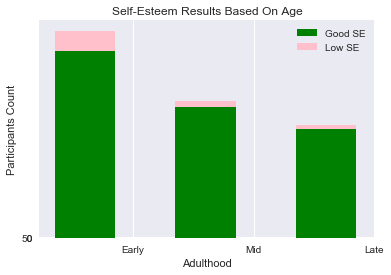

In [164]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
lowMeans = (num_early_low, num_mid_low, num_late_low)
goodMeans = (num_early_good, num_mid_good, num_late_good)

ind = np.arange(N)    
bar_width = 0.4

p1 = plt.bar(ind, goodMeans, width, color = 'green')
p2 = plt.bar(ind, lowMeans, width, color ='pink', bottom = goodMeans)

plt.ylabel('Participants Count')
plt.title('Self-Esteem Results Based On Age')
plt.xticks(ind + bar_width, ('Early', 'Mid', 'Late'))
plt.xlabel('Adulthood')
plt.yticks(np.arange(0, 100, 50))
plt.legend((p1[0], p2[0]), ('Good SE', 'Low SE'))

plt.show()

### Data Limitation
1. Since the age was entered as a free response, I had to drop many rows that were illogical (either too small or too big) from the dataset. I believe it would've been better if age data was collected through a drop down list, just like gender, to limit the possible answers that the user will provide.


2. I was dealing with a sample where only %6.5 of my dataset suffered from low self-esteem. This percentage is very low, and limited my confidence in reaching conclusions about low self-esteem.

## 5. Communicate

Within the given sample that took the self-esteem test, it was difficult overall to detect if factors like gender or age impacted the self-esteem. However, I managed to answer my initially proposed questions.


1. The average test score of my sample was around 26.07, which indicates that most of the participants had good self-esteem results. Participants suffering from low self-esteem were about only %6.5 of my samples.


2. With the information we have, it is possible to say that females suffer from low self-esteem more than males, and that is aligned with my expectations as females deal with more obstacles in general due to global inequalities. But that could be misleading as well, as there were %25 more females participants than males in my sample.


3. In terms of age, overall young participants with ages that range from 12-20 years old suffer from low self-esteem than older generations. This is more probably related to personality development and maturity. The younger the generation, the more pressure they are facing and the less clues they own to face those pressures.

### References

* [1] http://personality-testing.info/tests/RSE.php
* [2] https://en.wikipedia.org/wiki/Rosenberg_self-esteem_scale
* [3] http://fetzer.org/sites/default/files/images/stories/pdf/selfmeasures/Self_Measures_for_Self-Esteem_ROSENBERG_SELF-ESTEEM.pdf
* [4] http://personality-testing.info/_rawdata/